# Form factors from saturation model

In [3]:
#include "FormFactor_saturation_data.h"
#include "FormFactor_t_1D.h"

### Data from $\phi$ saturation model plot scan

In [4]:
const int phi_bins = 72;
double phi_min = 0, phi_max = .18;
double phi_x_vals[phi_bins] = {0.00149180044251802,0.00414660644107207,0.00658017860641328,0.00901375077175449,0.0116685567703085,0.0141021289356497,0.0167569349342038,0.019190507099545,
0.0216240792648862,0.0240576514302274,0.0264912235955686,0.0291460295941226,0.031358367926251,0.0340131739248051,0.0364467460901463,0.0388803182554875,0.0413138904208287,
0.0437474625861699,0.0464022685847239,0.0488358407500651,0.0514906467486192,0.0539242189139604,0.0565790249125144,0.0587913632446428,0.0614461692431968,0.063879741408538,
0.0663133135738793,0.0687468857392204,0.0714016917377745,0.0738352639031157,0.0762688360684569,0.078923642067011,0.0813572142323522,0.0837907863976934,0.0864455923962474,
0.0888791645615886,0.0913127367269298,0.093746308892271,0.0961798810576122,0.0988346870561663,0.101268259221507,0.103701831386849,0.10613540355219,0.108347741884318,
0.111223781716085,0.113657353881426,0.115869692213555,0.118745732045322,0.121400538043876,0.123391642542791,0.126267682374558,0.128480020706686,0.130913592872028,0.133568398870582,
0.13578073720271,0.138656777034477,0.140869115366605,0.143523921365159,0.145736259697288,0.148391065695842,0.151045871694396,0.153479443859737,0.155913016025078,0.158346588190419,
0.161001394188973,0.163213732521102,0.165868538519656,0.168302110684997,0.170735682850338,0.173390488848892,0.175824061014234,0.178257633179575};
double phi_y_vals[phi_bins] = {558853.176136302,224087.526703047,77159.7780282615,21685.4626196854,3859.28092747389,469.329022940005,289.742995521137,760.224527180162,
1470.8807418139,1802.07568265643,1669.9354709361,1434.01276162091,1170.46235898057,841.471980674726,519.487609780666,282.480517526656,122.231121530435,44.2796290689089,
12.7645685962943,8.2906879074936,17.31009647318,34.352592563701,55.6447229185968,73.5686667137878,87.8747301398829,92.4512729862438,94.8281637591125,90.133959553294,
79.3900768010247,68.1741212520722,54.2499745313981,42.0876893247695,31.8336312913207,22.312279620763,14.1287559597991,8.94672119409074,4.99001275499674,2.71340713225333,
1.43847998384123,1.00823457225525,1.11598759598992,1.47546281479756,2.21472290755771,3.15981484859246,4.07292198289417,4.74299606783303,5.523310241139,6.11360281380503,
6.59736568024521,6.59736568024521,6.43200111987633,5.96036388624306,5.523310241139,5.11830428512649,4.50820725397009,3.87130332084099,3.08061332807508,2.64539492870511,
2.15921034425629,1.55230536986868,1.14467925737936,0.888053964582182,0.638442170129982,0.384266614281411,0.29811799949135,0.198608151462336,0.12899755970887,
0.139204998947095,0.150220141959229,0.162106901482951,0.198608151462336,0.237229223974273,};
 
FormFactor_saturation_data phi_saturation(phi_bins,phi_x_vals,phi_y_vals);

double A = 197, Vo = 2.12, R = 6.38, a0 = 0.7;
double r_min = 0, r_max = 10;
FormFactor_t_1D ff_phi(A,Vo,R,a0,phi_min,phi_max,phi_bins,r_min,r_max);

## Graph of data points from $\phi$ plot scan

** note that the saturation model is in units of $nb/GeV^{2}$ while $|F(t)|^{2}$ is dimensionless

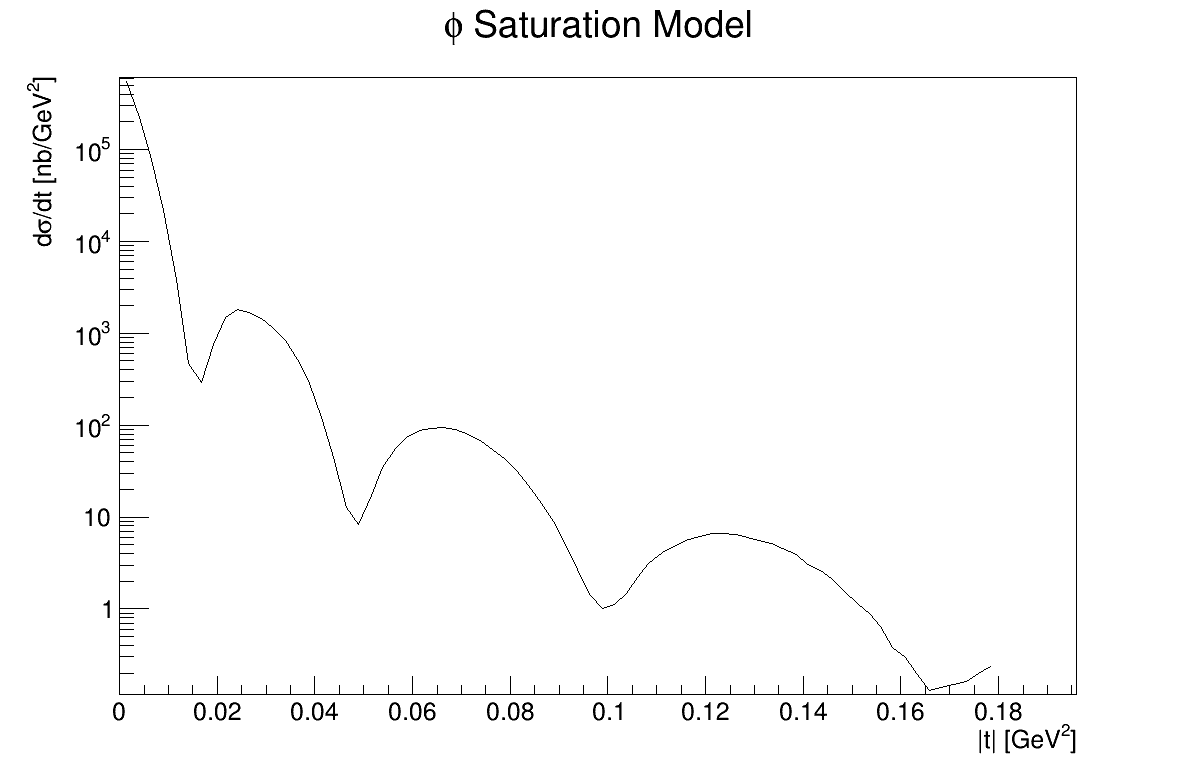

In [5]:
TCanvas *c1 = new TCanvas("", "", 1200, 800);

TGraph *phi_graph = phi_saturation.getGraph();
    phi_graph->SetTitle("#phi Saturation Model");
    phi_graph->GetXaxis()->SetTitle("|t| [GeV^{2}]");
    phi_graph->GetYaxis()->SetTitle("d#sigma/dt [nb/GeV^{2}]");
    phi_graph->Draw();

c1->Draw();
gPad->SetLogy(1);

## Compare true form factor histogram with $\phi$ data histogram

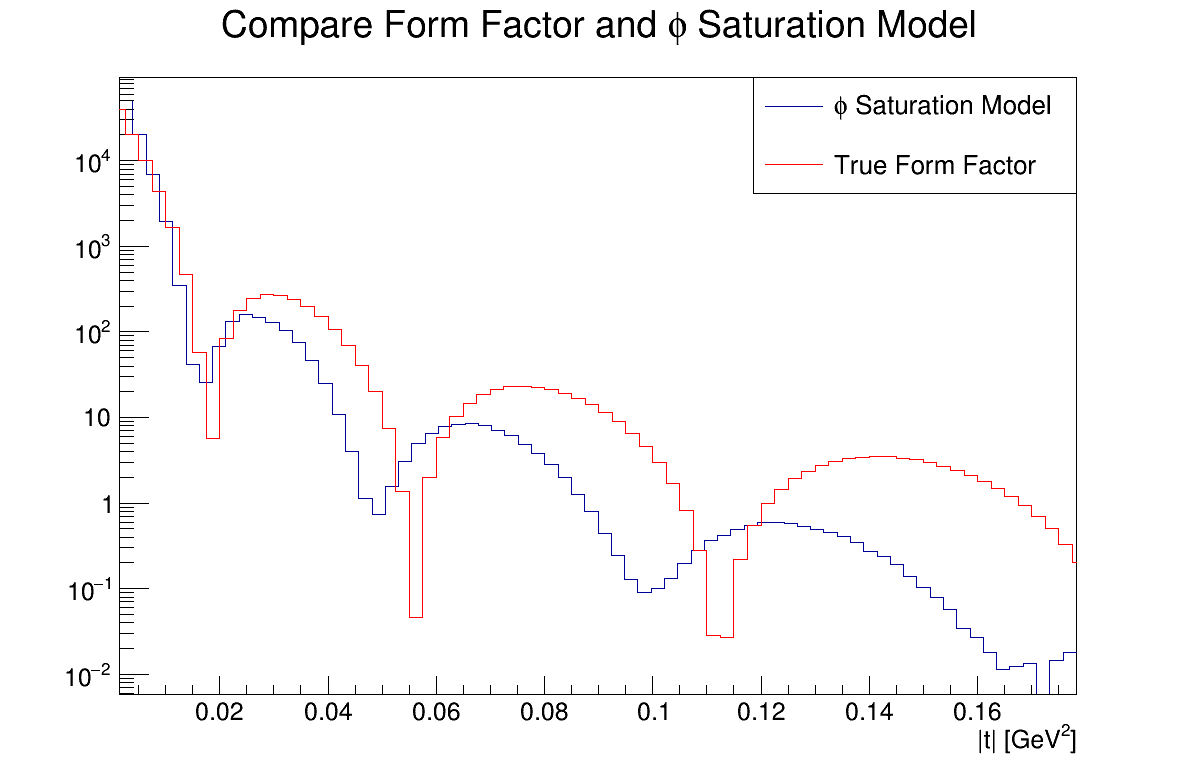

In [6]:
TCanvas *c1 = new TCanvas("", "", 1200, 800);

TH1D *phi_hist = phi_saturation.getHist();
    phi_hist->SetTitle("Compare Form Factor and #phi Saturation Model");
    phi_hist->GetXaxis()->SetTitle("|t| [GeV^{2}]");
    phi_hist->Scale(197./phi_hist->Integral(), "width");
    phi_hist->SetMarkerColor(kBlack);
    phi_hist->SetMarkerStyle(1);
    for (int i = 1; i <= phi_hist->GetNbinsX(); ++i)
    { 
        phi_hist->SetBinError(i, 0); // Setting error bars to zero 
    }
    phi_hist->Draw();

TH1D *ff_hist_phi = ff_phi.getFF_hist();
    ff_hist_phi->Scale(197./ff_hist_phi->Integral(), "width");
    ff_hist_phi->SetLineColor(kRed);
    ff_hist_phi->Draw("same");

auto legend = new TLegend(0.63,0.75,0.9,0.9);
	legend->AddEntry(phi_hist,"#phi Saturation Model","l");
    legend->AddEntry(ff_hist_phi,"True Form Factor","l");
    legend->Draw();

gStyle->SetOptStat(0);
gPad->SetLogy(1);
c1->Draw();

### Data from $J/\psi$ saturation model plot scan

In [7]:
const int Jpsi_bins = 70;
double Jpsi_min = 0, Jpsi_max = .18;
double Jpsi_x_vals[Jpsi_bins] = {0.00136281334124255, 0.00417373659242085, 0.00679726496018727, 0.0090460035611299, 0.0114821370454844, 0.0141056654132508, 0.0165417988976054, 0.0189779323819599,
0.0216014607497263, 0.0240375942340808, 0.0266611226018472, 0.0339695230549108, 0.0364056565392653, 0.0390291849070318, 0.0414653183913863, 0.0439014518757408,
0.0465249802435072, 0.0487737188444499, 0.0513972472122163, 0.0538333806965708, 0.0564569090643372, 0.0588930425486917, 0.0613291760330463, 0.0637653095174008,
0.0662014430017553, 0.0686375764861098, 0.0712611048538762, 0.0736972383382308, 0.0763207667059972, 0.0787569001903517, 0.0811930336747062, 0.0838165620424727,
0.0862526955268272, 0.0886888290111817, 0.0913123573789481, 0.0937484908633026, 0.0961846243476572, 0.0986207578320117, 0.101056891316366, 0.103680419684133,
0.106116553168487, 0.108552686652842, 0.110988820137196, 0.113612348504963, 0.116048481989317, 0.118484615473672, 0.120920748958026, 0.123356882442381,
0.125980410810147, 0.12822914941109, 0.131040072662268, 0.133288811263211, 0.135912339630977, 0.138348473115332, 0.140784606599686, 0.143408134967453,
0.145844268451807, 0.148467796819574, 0.150903930303928, 0.153340063788283, 0.155776197272637, 0.158399725640404, 0.160835859124758, 0.163271992609113,
0.165895520976879, 0.168331654461233, 0.170767787945588, 0.173391316313354, 0.175640054914297, 0.178076188398652};
double Jpsi_y_vals[Jpsi_bins] = {13448.9218102926, 6937.46196167787, 3204.7878500576, 1305.08427031405, 446.872520224438, 103.18239774925, 8.55278296449268,
11.005917498039, 31.6399824551623, 54.9298751813913, 66.3663164066068, 60.3779220946169, 46.9201466951133, 32.653225248372, 21.3360051124315,
12.4849168326106, 6.24035001776384, 2.58162492032996, 0.912279863030455, 0.596094495215495, 1.1375147582384, 2.17069581349244, 3.37486862233193,
4.3428584331333, 5.16499432428701, 5.58848994755982, 5.7674564552788, 5.67726804222898, 5.41507684299759, 4.84942389709097, 4.14229378615772,
3.48294584122589, 2.83767526873991, 2.17069581349244, 1.60896053571582, 1.15558518403178, 0.779253636732963, 0.485658601659348, 0.288701178756081,
0.163693431856085, 0.110384508079367, 0.100424245161287, 0.148922974953952, 0.197774527183426, 0.27106213627279, 0.343354491666976, 0.408354089359272,
0.470588418718807, 0.525479418352291, 0.533827122649325, 0.586773086901781, 0.577597441807907, 0.568565280566255, 0.533827122649325, 0.525479418352291,
0.493373717141273, 0.434927240554336, 0.377409027059443, 0.322376245262033, 0.27974266435082, 0.238951332128076, 0.188640778332054, 0.151288747835883,
0.123260124544862, 0.0885276988118201, 0.06258796389094, 0.0486375871383818, 0.032285236309424, 0.0250891049438687, 0.0191920533212076};

FormFactor_saturation_data Jpsi_saturation(Jpsi_bins,Jpsi_x_vals,Jpsi_y_vals);
FormFactor_t_1D ff_Jpsi(A,Vo,R,a0,Jpsi_min,Jpsi_max,Jpsi_bins,r_min,r_max);

## Graph of data points from $J/\psi$ plot scan

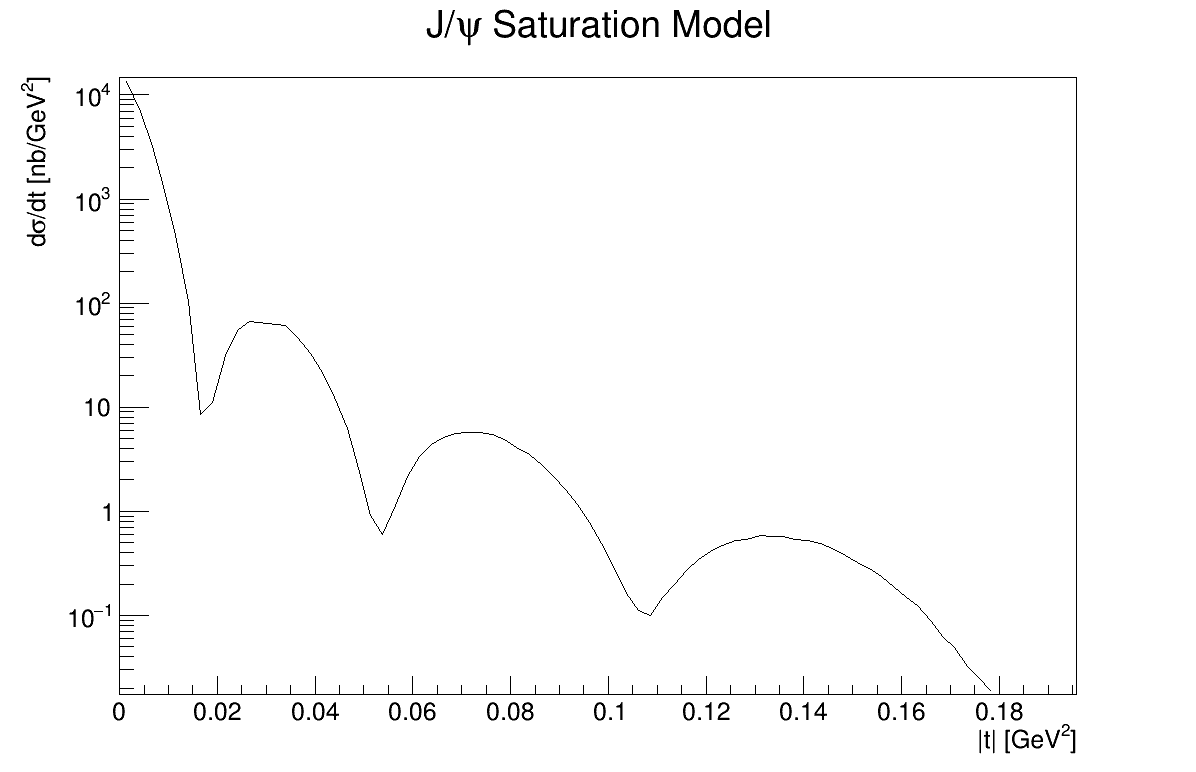

In [10]:
TCanvas *c1 = new TCanvas("", "", 1200, 800);

TGraph *Jpsi_graph = Jpsi_saturation.getGraph();
    Jpsi_graph->SetTitle("J/#psi Saturation Model");
    Jpsi_graph->GetXaxis()->SetTitle("|t| [GeV^{2}]");
    Jpsi_graph->GetYaxis()->SetTitle("d#sigma/dt [nb/GeV^{2}]");
    Jpsi_graph->Draw();

gPad->SetLogy(1);
c1->Draw();

## Compare true form factor histogram with $J/\psi$ data histogram

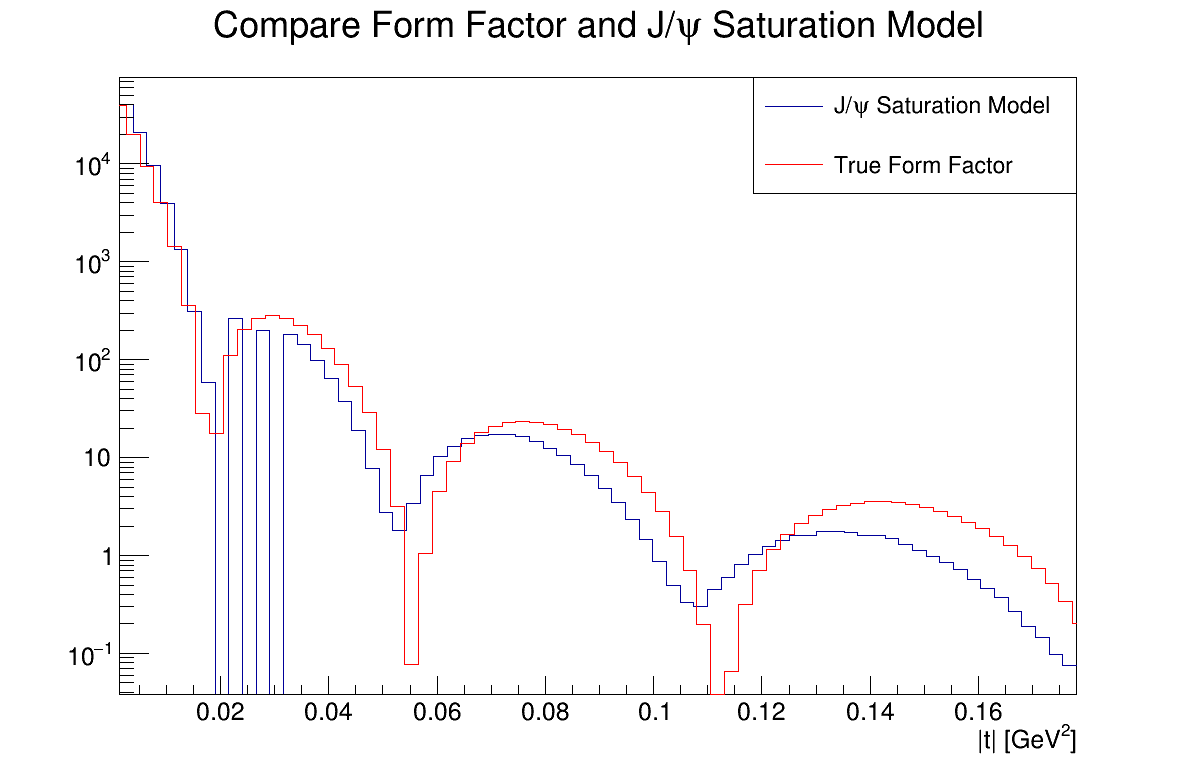

In [11]:
TCanvas *c1 = new TCanvas("", "", 1200, 800);

TH1D *Jpsi_hist = Jpsi_saturation.getHist();
    Jpsi_hist->SetTitle("Compare Form Factor and J/#psi Saturation Model");
    Jpsi_hist->Scale(197./Jpsi_hist->Integral(), "width");
    Jpsi_hist->GetXaxis()->SetTitle("|t| [GeV^{2}]");
    Jpsi_hist->SetMarkerColor(kBlack);
    for (int i = 1; i <= phi_hist->GetNbinsX(); ++i)
    { 
        Jpsi_hist->SetBinError(i, 0); // Setting error bars to zero 
    }
    Jpsi_hist->SetMarkerStyle(1);
    Jpsi_hist->Draw();

TH1D *ff_hist_Jpsi = ff_Jpsi.getFF_hist();
    ff_hist_Jpsi->Scale(197./ff_hist_Jpsi->Integral(), "width");
    ff_hist_Jpsi->SetLineColor(kRed);
    ff_hist_Jpsi->Draw("same");

auto legend = new TLegend(0.63,0.75,0.9,0.9);
	legend->AddEntry(Jpsi_hist,"J/#psi Saturation Model","l");
    legend->AddEntry(ff_hist_Jpsi,"True Form Factor","l");
    legend->Draw();

gStyle->SetOptStat(0);
gPad->SetLogy(1);
c1->Draw();